# Optical Circuits

This tutorial covers Perceval Circuit build, display and usage.

In Perceval, a *circuit* represents a setup of linear optical (LO) components, used
to guide and act on photons. Simple examples of circuits are common optical devices such as beam
splitters or phase shifters.

A circuit has a fixed number of *spatial modes* (sometimes also called
*paths*) $m$, which is the same for input as for output
spatial modes.

In particular, note that:

* *single photon sources* aren't circuits, since they do not have input spatial
  modes (they don't guide or act on incoming photons, but *produce*
  photons that are sent into a circuit),
* *photon detectors* aren't circuits either, for similar reasons

## I. LO-components

The linear optical components are the elementary blocks which will on Perceval quantum states.

It's important to know how to handle the most basic components and understand their effects.

At first, let's see what's possible with a `PERM` instance (permutation), a `BS` (beam splitter) and a `PS` (phase shifter).

<div class="admonition note"> <p class="admonition-title">All circuits and components can be displayed with `pcvl.pdisplay`</p></div>

PERM
PERM([2, 0, 1])


<IPython.core.display.Math object>

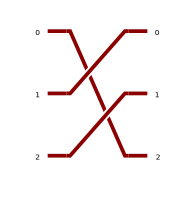

In [1]:
import perceval as pcvl
import numpy as np
from perceval.components import PS, BS, PERM

## Permutation
perm = PERM([2, 0, 1])

print(perm.name)
print(perm.describe())
pcvl.pdisplay(perm.definition())
pcvl.pdisplay(perm)

PS
PS(phi=pi)


<IPython.core.display.Math object>

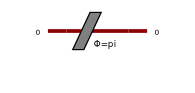

In [2]:
## Phase shifter
ps = PS(phi=np.pi)

print(ps.name)
print(ps.describe())
pcvl.pdisplay(ps.definition())
pcvl.pdisplay(ps)  # A pdisplay call on a circuit/processor needs to be the last line of a cell in a notebook

BS.Rx() unitary matrix


<IPython.core.display.Math object>

BS.H() unitary matrix


<IPython.core.display.Math object>

BS.Ry() unitary matrix


<IPython.core.display.Math object>

BS displays its convention as a small label


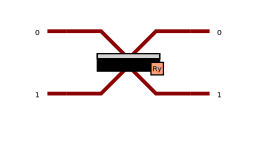

In [3]:
## Beam splitters
bs_rx = BS.Rx()  # By default, a beam splitter follows the Rx gate convention, so bs=BS() has the same matrix

# But other conventions exist too:
bs_h = BS.H()
bs_ry = BS.Ry()

## Check the difference in the unitary definition:
print("BS.Rx() unitary matrix")
pcvl.pdisplay(bs_rx.definition())
print("BS.H() unitary matrix")
pcvl.pdisplay(bs_h.definition())
print("BS.Ry() unitary matrix")
pcvl.pdisplay(bs_ry.definition())
print("BS displays its convention as a small label")
pcvl.pdisplay(bs_ry)

In [4]:
# You can ask for the symbolic matrix value of your component with the attribute U
my_ps = PS(phi=np.pi/8)
pcvl.pdisplay(my_ps.U)
# And for the numerical value with the method compute_unitary
pcvl.pdisplay(my_ps.compute_unitary())

#  - by using the syntax pcvl.P to create a symbolic variable
#    (note that you cannot compute the numerical value of your component anymore)
print("A Phase Shifter with a symbolic value for phi:")
ps = PS(phi=pcvl.P(r'\psi'))  # Note the use of a raw string to be able to get a Latex visualization of the variable
pcvl.pdisplay(ps.U)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A Phase Shifter with a symbolic value for phi:


<IPython.core.display.Math object>

In [5]:
# If you do it for a Beam-Splitter, you can see that by default theta=pi/2, and the phi's are 0
print("A default beam-splitter:")
pcvl.pdisplay(BS().compute_unitary())  # this is a balanced Beamsplitter
print("")

# To control the value of the parameters of a component, several choices are possible:
#  - by setting a numerical value during the creation of the component
print("A Beam-Splitter with a numerical value for theta:")
bs_rx = BS.Rx(theta=10)
pcvl.pdisplay(bs_rx.U)
pcvl.pdisplay(bs_rx.compute_unitary())
print("")

#  - by using the syntax pcvl.P to create a symbolic variable
#    (note that you cannot compute the numerical value of your component anymore)
print("A Phase Shifter with a symbolic value for phi:")
ps = PS(phi=pcvl.P(r'\psi'))
pcvl.pdisplay(ps.U)
print("")

#  - you can still modify the value of a symbolic variable after its creation
#    This is not true for a numerical variable!
print("A beam-splitter with a symbolic variable...")
bs_rx = BS(theta=pcvl.P('toto'))
pcvl.pdisplay(bs_rx.U)
bs_rx.assign({'toto':5})
bs_rx.assign({'toto':10})
print("... set to a numerical value")
pcvl.pdisplay(bs_rx.compute_unitary())

A default beam-splitter:


<IPython.core.display.Math object>


A Beam-Splitter with a numerical value for theta:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


A Phase Shifter with a symbolic value for phi:


<IPython.core.display.Math object>


A beam-splitter with a symbolic variable...


<IPython.core.display.Math object>

... set to a numerical value


<IPython.core.display.Math object>

<IPython.core.display.Math object>

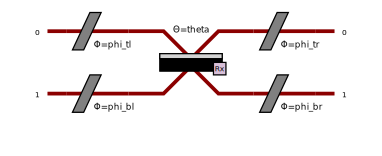

In [6]:
## to understand the conventions, you can note that a BS.Rx with the 4 phases phi (top left/right and bottom left/right) can be represented like that

## For this cell, we needed the syntax to builds circuits... Good transition !

bs_rx_circuit=pcvl.Circuit(2) // (0, PS(phi=pcvl.P("phi_tl"))) // (1, PS(phi=pcvl.P("phi_bl"))) // BS(theta=pcvl.P('theta')) // (0, PS(phi=pcvl.P("phi_tr"))) // (1, PS(phi=pcvl.P("phi_br")))

pcvl.pdisplay(bs_rx_circuit.U)

# we can check it's the same as bs_rx.definition()
pcvl.pdisplay(bs_rx_circuit)

## II. LO-circuits

From the LO-components, we can build a LO-circuit, i.e. a sequence of those components acting on our different modes.

<div class="admonition danger"> <p class="admonition-title">
A *LO circuit* (just called "circuit" here) isn't the same as a
*quantum circuit*. Quantum circuits act on *qubits*, i.e. abstract systems in a 2-dimensional
Hilbert space (or "computational space); while optical circuits act on *photons*
distributed in spatial modes (in the "Fock space"). It is possible to simply encode
qubits with photons in an optical circuit; some encodings are
presented later in this tutorial.</p></div>

<table><tr>
<td>![grover-circuit.png](../_static/img/grover-circuit.png)</td>
<td>![grover-perceval.png](../_static/img/grover-perceval.png)</td>
</tr></table>
Optimized Grover algorithm (on the left) converted to a Perceval circuit (on the right).

### 1. Syntax

<IPython.core.display.Math object>

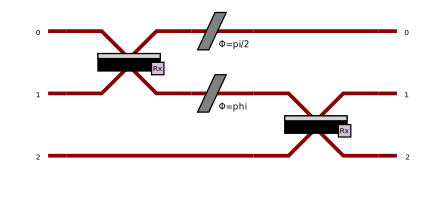

In [7]:
circuit = pcvl.Circuit(3)  # Create an empty 3 mode circuit

circuit.add(0, BS())  # The beam splitter is added to the circuit on mode 0 and 1
                      # even though only the first mode is required in `add` method
circuit.add(0, PS(phi=np.pi/2)).add(1, PS(phi=pcvl.P('phi'))).add(1, BS())

# Equivalent syntax:
# circuit // BS() // PS(phi=np.pi/2) // (1, PS(phi=pcvl.P('phi'))) // (1, BS())

pcvl.pdisplay(circuit.U)
pcvl.pdisplay(circuit)

In the circuit rendering above, the red lines, corresponding to spatial modes, are representing optical
fibers on which photons are sent from the left to the right.

The syntax ``pcvl.P('phi')`` allows you to use parameters in the circuit, where you can assign a value or not. The behavior of the parameters of a circuit is similar to the case of the components.

For instance, you can use :

[Parameter(name='phi', value=None, min_v=0.0, max_v=6.283185307179586)]


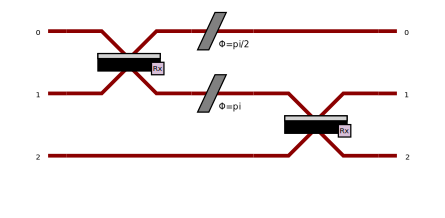

In [8]:
params=circuit.get_parameters()
print(params) # list of the parameters

# the value is not set, but we can change that with:
params[0].set_value(np.pi)
pcvl.pdisplay(circuit)

### 2. Mach-Zehnder Interferometers

The beamsplitter's angle $\theta$ can also be defined as a parameter.

However, as the reflexivity depends on the mirror, it's hard to have adaptibility on the angle.
Therefore, in practice, we use a [Mach-Zehnder Interferometer](https://en.wikipedia.org/wiki/Mach%E2%80%93Zehnder_interferometer).

The beamsplitter with a parameterised $\theta$ is therefore implemented with a parameterised phase shifter $\phi$ between two fixed beamsplitters.



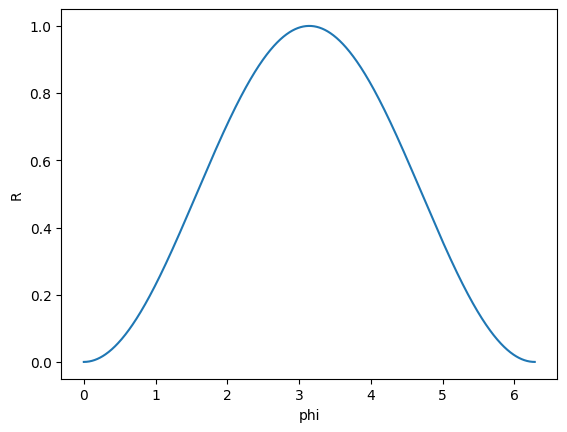

In [9]:
## Exercise: build a circuit implementing the mzi

## Solution:
mzi = pcvl.Circuit(2) // BS() // (1,PS(phi=pcvl.P("phi"))) // BS()
pcvl.pdisplay(mzi)


## Exercise: Check that the parameterised phase allows you to change the reflexivity of your MZI

## Solution:
import matplotlib.pyplot as plt

X = np.linspace(0, 2*np.pi, 1000)  # We create a list of all different values for theta
Y = []
for theta in X:
    phase = mzi.get_parameters()[0]
    phase.set_value(theta)
    Y.append(abs(mzi.compute_unitary()[0,0])**2)  # compute_unitary is numerical, so far faster that mzi.U, which uses symbolic expressions.

plt.plot(X, Y)
plt.xlabel("phi")
plt.ylabel("R")
plt.show()

## Note: If you need to create a BS directly from the reflexivity value, please use:
## BS(BS.r_to_theta(reflectivity_value))
## However, be aware that only theta value is stored inside the BS object

### 3. Universal Circuits

An operation on the modes of our circuit can also be expressed as a unitary matrix.

For three modes, the unitary $U=\begin{pmatrix}
a_{1,1} & a_{1,2} & a_{1,3}\\
a_{2,1} & a_{2,2} & a_{2,3} \\
a_{3,1} & a_{3,2} & a_{3,3}
\end{pmatrix}$ performs the following operation on the Fock state basis:

$$\begin{array}{rcl}
|1,0,0\rangle &  \mapsto&  a_{1,1}|1,0,0\rangle + a_{1,2}|0,1,0\rangle + a_{1,3}|0,0,1\rangle\\
|0,1,0\rangle &  \mapsto&  a_{2,1}|1,0,0\rangle + a_{2,2}|0,1,0\rangle + a_{2,3}|0,0,1\rangle\\
|0,0,1\rangle &  \mapsto&  a_{3,1}|1,0,0\rangle + a_{3,2}|0,1,0\rangle + a_{3,3}|0,0,1\rangle
\end{array}$$

Since 1994, we know that any $U$ on the modes can be implemented as an LO-circuit [Reck's et al](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.73.58).

This decomposition can be done easily in Perceval using beamsplitters and phase-shifters as follows.

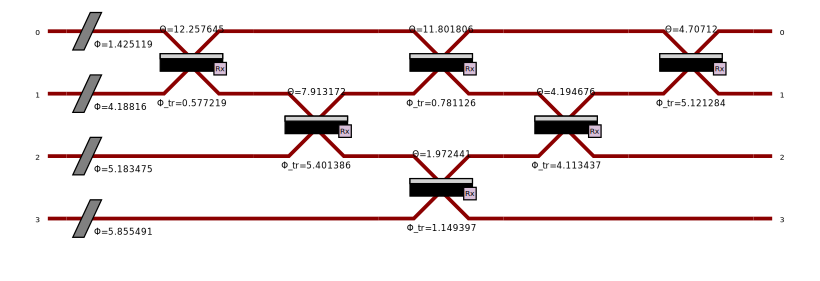

In [10]:
## From any unitary
n = 4
U = pcvl.Matrix.random_unitary(n)

decomposed_circuit = pcvl.Circuit.decomposition(U, BS(theta=pcvl.P('theta'), phi_tr=pcvl.P('phi')), phase_shifter_fn=PS)
pcvl.pdisplay(decomposed_circuit)

In [11]:
print("The error between the two unitaries is", np.linalg.norm(U - decomposed_circuit.compute_unitary()))

The error between the two unitaries is 8.389156479164214e-09


In [12]:
## Exercise: decompose your unitary with only phase shifters and balanced beamsplitters.

## Solution:
mzi = pcvl.Circuit(2) // BS() // PS(pcvl.P("phi1")) // BS() // PS(pcvl.P("phi2"))

circuit_u = pcvl.Circuit.decomposition(U, mzi, phase_shifter_fn=PS)

## Note: you can use a MZI. Be careful to put the phase on the right, as the full layer of phase_shifter_fn is on the left of the circuit

In [13]:
## Exercise: check the norm of the difference to be sure it has worked well

## Solution:
print("The error between the two unitaries is", np.linalg.norm(U - circuit_u.compute_unitary()))

The error between the two unitaries is 8.495768239381994e-09


<div class="admonition danger"> <p class="admonition-title">
Even if it is a good example to show how to decompose an arbitrary unitary matrix to a generic interferometer using Perceval, it is also possible to compute results without doing so. As the decomposition step is quite time-consuming, it's often better to skip this step when you're not sure if you require it.</p> </div>

### 4. Black Box

To improve readability, the circuit can be constructed in different steps, combined with multiple hierarchy levels. The higher level circuit then treat their complex components as black boxes. Writing black boxes helps writing generic reusable operations.


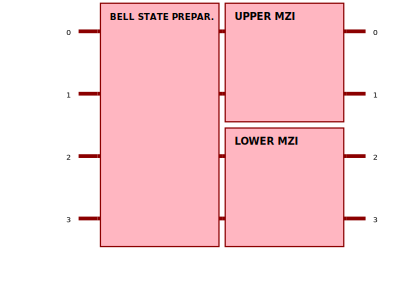

In [14]:
pre_MZI = (pcvl.Circuit(4, name="Bell State Prepar.")
           .add(0, BS())
           .add(2, BS())
           .add(1, PERM([1, 0])))

upper_MZI = (pcvl.Circuit(2, name="upper MZI")
             .add(0, PS(phi=pcvl.P('phi_0')))
             .add(0, BS())
             .add(0, PS(phi=pcvl.P('phi_2')))
             .add(0, BS()))

lower_MZI = (pcvl.Circuit(2, name="lower MZI")
             .add(0, PS(phi=pcvl.P('phi_1')))
             .add(0, BS())
             .add(0, PS(phi=pcvl.P('phi_3')))
             .add(0, BS()))

chip = (pcvl.Circuit(4)
              .add(0, pre_MZI)
              .add(0, upper_MZI, merge=False)
              .add(2, lower_MZI, merge=False))

pcvl.pdisplay(chip)

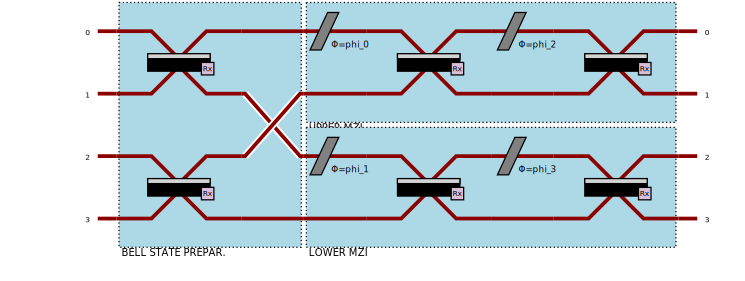

In [15]:
## You can still display the inside of black boxes with:
pcvl.pdisplay(chip, recursive=True)

## III. Experiments

More than just defining a LO circuit, it could be interesting to build what is around the unitary components. Setuping the input state, noise, post-selection functions, detectors... is important important in real world computations. Great news: that's exactly what an `Experiment` is made for.

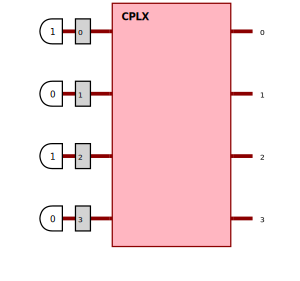

In [16]:
# Define your experiment
experiment = pcvl.Experiment(4, pcvl.NoiseModel(brightness= 0.8, indistinguishability=0.9))
experiment.add(0, chip)  # Those two lines could also be replaced by experiment = pcvl.Experiment(chip, NoiseModel(...))

# Define your input
experiment.with_input(pcvl.BasicState([1, 0, 1, 0]))

# Define conditions on the output
experiment.min_detected_photons_filter(2)  # Postselection on the number of photons of the output
experiment.set_postselection(pcvl.PostSelect("[0, 1] == 1 & [2, 3] == 1"))  # Postselection using logical conditions

pcvl.pdisplay(experiment)  # chip is now a black box for the experiment

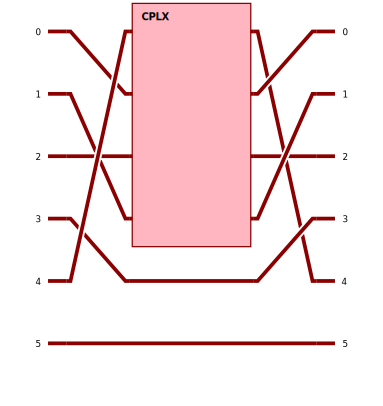

In [17]:
# Experiments can be composed more freely than circuits
expe = pcvl.Experiment(6)
expe.add({0: 1, 1: 3, 2: 2, 4: 0}, experiment)  # Only the inner components are added

pcvl.pdisplay(expe)

{'phi': Parameter(name='phi', value=None, min_v=0.0, max_v=6.283185307179586)}
[[-1.000000e+00+6.123234e-17j -6.123234e-17+0.000000e+00j]
 [-6.123234e-17+0.000000e+00j  1.000000e+00-6.123234e-17j]]


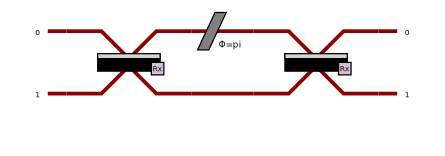

In [18]:
# Variables are still accessible through experiment
experiment = pcvl.Experiment(2).add(0, pcvl.BS()).add(0, pcvl.PS(pcvl.P("phi"))).add(0, pcvl.BS())

print(experiment.get_circuit_parameters())
experiment.get_circuit_parameters()["phi"].set_value(np.pi)

# In case the Experiment describes a unitary circuit, this circuit can be retrieved using
circ = experiment.unitary_circuit()

print(circ.compute_unitary())

pcvl.pdisplay(circ)

Experiments can also handle a few non-unitary components, which is not possible in the `Circuit` class. A tutorial part for advanced users covers this use case.